## 気づいたこと

- 対数価格の分布が正規分布っぽくない (何分布？)
- 0円のものがある (取得できていないだけ？)
- 一部極端に安いものがある (log(1 + price * 1e-18)かlog(price)かで標準偏差に大きく差が出る。評価指標をどれにするべきか？)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../data/taskA/table/asset_data.csv')
df['last_sale.total_price'] = df['last_sale.total_price'].astype('float')

print('重複しているもの')
display(df.loc[df['id'].duplicated(keep=False)])

print('価格が0のもの')
display(df.loc[df['last_sale.total_price'] == 0])

print('重複と価格0を削除')
df = df.loc[~df['id'].duplicated()]
df = df.loc[df['last_sale.total_price'] > 0]
display(df)

重複しているもの


,id,num_sales,image_url,asset_contract.name,owner.address,last_sale.quantity,last_sale.total_price,image_id
1148,74043247,2,https://lh3.googleusercontent.com/diRaNKMKGonz...,Doodles,0xcb45adccd82d5379124702ba72904a43a5b6f584,1,1.370000e+18,1148.png
1149,74056797,2,https://lh3.googleusercontent.com/URMKypXOVvt8...,Doodles,0xbd923b473d145a91ceaf12bb66a8007d1eeb1c61,1,1.369900e+18,1149.png
1150,74043247,2,https://lh3.googleusercontent.com/diRaNKMKGonz...,Doodles,0xcb45adccd82d5379124702ba72904a43a5b6f584,1,1.370000e+18,1150.png
1151,74056797,2,https://lh3.googleusercontent.com/URMKypXOVvt8...,Doodles,0xbd923b473d145a91ceaf12bb66a8007d1eeb1c61,1,1.369900e+18,1151.png


価格が0のもの


,id,num_sales,image_url,asset_contract.name,owner.address,last_sale.quantity,last_sale.total_price,image_id
90,528161,5,https://lh3.googleusercontent.com/qOcc-CLQhyG-...,CryptoPunks,0x269616d549d7e8eaa82dfb17028d0b212d11232a,1,0.0,90.png
91,530444,3,https://lh3.googleusercontent.com/lfnpTZEaqx1M...,CryptoPunks,0x269616d549d7e8eaa82dfb17028d0b212d11232a,1,0.0,91.png
107,178135,5,https://lh3.googleusercontent.com/Qo-rkIpJ2JIs...,CryptoPunks,0xb7f7f6c52f2e2fdb1963eab30438024864c313f6,1,0.0,107.png
155,179385,8,https://lh3.googleusercontent.com/QzOHmkpaC0FI...,CryptoPunks,0x269616d549d7e8eaa82dfb17028d0b212d11232a,1,0.0,155.png
472,528465,5,https://lh3.googleusercontent.com/FZmqJ6NwzvLS...,CryptoPunks,0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685,1,0.0,472.png


重複と価格0を削除


,id,num_sales,image_url,asset_contract.name,owner.address,last_sale.quantity,last_sale.total_price,image_id
0,529301,3,https://lh3.googleusercontent.com/FCqhaRVhNW41...,CryptoPunks,0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685,1,1.120000e+20,0.png
1,531020,3,https://lh3.googleusercontent.com/U7EA5fAkRSqw...,CryptoPunks,0xd044529d0e5a85d68f638c72af68ee79f56d5be0,1,8.700000e+19,1.png
2,527172,4,https://lh3.googleusercontent.com/PQfOlqlUUEL-...,CryptoPunks,0xb5d7752659227d07390981ce5d9d069c023174cf,1,9.795000e+19,2.png
3,526719,2,https://lh3.googleusercontent.com/6LHj5NUM5oD1...,CryptoPunks,0xc08fd8505a4665d5fe1a6b8eacb65ff7936ec3cd,1,1.099500e+20,3.png
4,529497,1,https://lh3.googleusercontent.com/tiDMhX8lrb-X...,CryptoPunks,0x07379370e6900e539e5789bdd79dbf74253c290f,1,1.250000e+20,4.png
...,...,...,...,...,...,...,...,...
1495,74043400,2,https://lh3.googleusercontent.com/k9wkwkGHoY8y...,Doodles,0x37690491647eca454955d2aa51937dfe8479b5b8,1,8.800000e+17,1495.png
1496,74043891,4,https://lh3.googleusercontent.com/f6NLQ5UGWx4W...,Doodles,0xd49a5f128318874de690ebf2c85623232008d964,1,9.290000e+17,1496.png
1497,74411479,2,https://lh3.googleusercontent.com/XB__ju9HpDFK...,Doodles,0x500898b272d3454d7ce39c1e99b469deffd92b74,1,9.500000e+17,1497.png
1498,74046384,1,https://lh3.googleusercontent.com/UHSWRkv_C5UD...,Doodles,0x24046d0a0e1590c5a57e8e99cfd4e72c7a891a33,1,1.100000e+18,1498.png


In [38]:
print(df['last_sale.total_price'].describe())

count    1.493000e+03
mean     1.421642e+20
std      3.220137e+21
min      1.500000e+11
25%      1.500000e+18
50%      3.800000e+19
75%      1.088000e+20
max      1.244571e+23
Name: last_sale.total_price, dtype: float64


[]

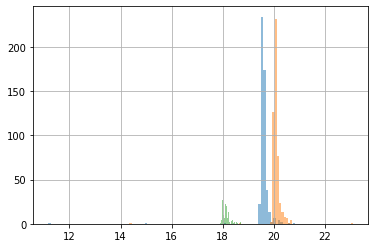

In [39]:
for cname, df_cname in df.groupby('asset_contract.name'): 
    np.log10(df_cname['last_sale.total_price']).hist(bins=100, alpha=0.5)
plt.plot()

In [40]:
print('np.log(price)の標準偏差')
x = np.log(df['last_sale.total_price'])
print(x.std())
for cname, df_cname in df.groupby('asset_contract.name'):
    x = np.log(df_cname['last_sale.total_price'])
    print(cname, x.std())
    
print('np.log1p(price)の標準偏差')
x = np.log1p(df['last_sale.total_price'])
print(x.std())
for cname, df_cname in df.groupby('asset_contract.name'):
    x = np.log1p(df_cname['last_sale.total_price'])
    print(cname, x.std())
    
print('np.log1p(price * 1e-18)の標準偏差')
x = np.log1p(df['last_sale.total_price'] * 1e-18)
print(x.std())
for cname, df_cname in df.groupby('asset_contract.name'):
    x = np.log1p(df_cname['last_sale.total_price'] * 1e-18)
    print(cname, x.std())

np.log(price)の標準偏差
2.0383696262634654
BoredApeYachtClub 1.0465297043510675
CryptoPunks 0.738870021808554
Doodles 0.3205345234519309
np.log1p(price)の標準偏差
2.038369626263425
BoredApeYachtClub 1.0465297043508206
CryptoPunks 0.7388700218085538
Doodles 0.3205345234519309
np.log1p(price * 1e-18)の標準偏差
1.704066316616251
BoredApeYachtClub 0.4046049708323719
CryptoPunks 0.4846918188709382
Doodles 0.2165324380480705
